# Лабораторная работа №4
## по предмету "Системы искусственного интеллекта"

Целью работы является введение и знакомство с нейронными сетями.


### Задание 1

Загрузите набор данных MNIST.
Проверьте баланс классов, нормализуйте данные.

In [1]:
from PIL import Image
import os
import numpy as np

def load_dataset(path):
    if not os.path.isdir(path):
        raise Exception('Invalid path')
    print(f'Loading data from {path}')
    
    x = []
    y = []

    for dir in os.listdir(path):
        for image in os.listdir(os.path.join(path, dir)):
            image = os.path.join(path, dir, image)
            print(f'{image}')
            img = Image.open(image).convert("L")
            x.append(list(img.getdata()))
            y.append(dir)

    return [x, np.array(y).astype(int)]

In [2]:
[x_train_raw, y_train] = load_dataset('./MNIST Dataset JPG format/MNIST - JPG - training')

Loading data from ./MNIST Dataset JPG format/MNIST - JPG - training
./MNIST Dataset JPG format/MNIST - JPG - training\9\58076.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\59887.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\54451.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\10529.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\52030.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\14984.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\55159.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\59668.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\10810.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\39927.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\25046.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\18382.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\45625.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\23944.jpg
./MNIST Dataset JPG format/MNIST - JPG - training\9\40528.jpg
./

KeyboardInterrupt: 

In [85]:
[x_test_raw, y_test] = load_dataset('./MNIST Dataset JPG format/MNIST - JPG - testing')

Loading data from ./MNIST Dataset JPG format/MNIST - JPG - testing
./MNIST Dataset JPG format/MNIST - JPG - testing\0\10.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1001.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1009.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\101.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1034.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1047.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1061.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1084.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1094.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1121.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1148.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1154.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1176.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1188.jpg
./MNIST Dataset JPG format/MNIST - JPG - testing\0\1191.jpg
./MNIST Dataset JPG format/MNIST - J

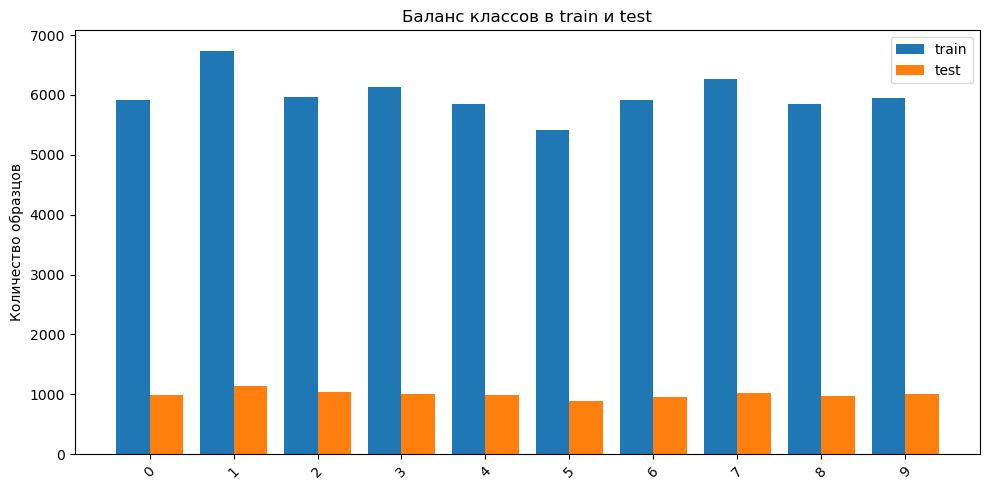

In [86]:
from collections import Counter
import matplotlib.pyplot as plt

train_counts = Counter(y_train)
test_counts = Counter(y_test)

classes = sorted(set(train_counts.keys()) | set(test_counts.keys()))

train_vals = [train_counts.get(c, 0) for c in classes]
test_vals = [test_counts.get(c, 0) for c in classes]

x = range(len(classes))

plt.figure(figsize=(10,5))
plt.bar([i - 0.2 for i in x], train_vals, width=0.4, label="train")
plt.bar([i + 0.2 for i in x], test_vals, width=0.4, label="test")

plt.xticks(x, classes, rotation=45)
plt.ylabel("Количество образцов")
plt.title("Баланс классов в train и test")
plt.legend()
plt.tight_layout()
plt.show()


In [87]:
import numpy as np

x_train = np.array(x_train_raw, dtype=np.float32) / 255.0
x_test = np.array(x_test_raw, dtype=np.float32) / 255.0

### Задание 2

Реализуйте однослойный перцептрон с применением алгоритма градиентного спуска для обучения.

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, input_size=784, output_size=10):
        self.W = np.random.randn(input_size, output_size) * 0.01
        self.b = np.zeros((1, output_size))
    
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return self.softmax(Z)
    
    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m
        return loss
    
    def train(self, X, Y, lr=0.1, epochs=10, batch_size=32):
        X = np.array(X)
        Y = np.array(Y).astype(int)
        
        for epoch in range(epochs):
            total_loss = 0
            num_batches = 0
            
            # Перемешиваем данные каждый эпох
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]
            
            for i in range(0, len(X), batch_size):
                end_idx = min(i + batch_size, len(X))
                x_batch = X_shuffled[i:end_idx]
                y_batch = Y_shuffled[i:end_idx]
                
                y_true = np.zeros((len(x_batch), 10))
                y_true[np.arange(len(x_batch)), y_batch] = 1
                
                y_pred = self.forward(x_batch)
                
                loss = self.compute_loss(y_true, y_pred)
                total_loss += loss
                num_batches += 1
                
                dZ = y_pred - y_true
                dW = np.dot(x_batch.T, dZ) / x_batch.shape[0]
                db = np.sum(dZ, axis=0, keepdims=True) / x_batch.shape[0]
                
                self.W -= lr * dW
                self.b -= lr * db
            
            avg_loss = total_loss / num_batches
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
    
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [89]:
lr = LogisticRegression()

lr.train(x_train, y_train)


Epoch 1/10, Loss: 0.4154
Epoch 2/10, Loss: 0.3138
Epoch 3/10, Loss: 0.2968
Epoch 4/10, Loss: 0.2870
Epoch 5/10, Loss: 0.2811
Epoch 6/10, Loss: 0.2769
Epoch 7/10, Loss: 0.2732
Epoch 8/10, Loss: 0.2706
Epoch 9/10, Loss: 0.2680
Epoch 10/10, Loss: 0.2659


In [90]:
pred = lr.predict(x_test)

ctr = 0

for i, label in enumerate(y_test):
    label = int(label)
    if label == pred[i]:
        ctr += 1

print(ctr/len(y_test))

0.9259


### Задание 3

Изучите документацию библиотеки PyTorch, посмотрите, как создаются сверточные, полносвязные слои и слои пуллинга. Напишите свою нейронную сеть, поэксперементируйте со слоями. Обучите ее на основе набора данных MNIST.

In [102]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class SingleLayerPerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=20, lr=0.01):
    train_dataset = TensorDataset(x_train, y_train)
    test_dataset = TensorDataset(x_test, y_test)
    
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    # Оптимизатор и функция потерь
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    # Обучение
    train_losses = []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        train_losses.append(epoch_loss / len(train_loader))
        
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}')
    
    # Предсказания
    def get_predictions(loader):
        model.eval()
        all_predictions = []
        all_labels = []
        with torch.no_grad():
            for batch_x, batch_y in loader:
                outputs = model(batch_x)
                _, predicted = torch.max(outputs.data, 1)
                all_predictions.extend(predicted.cpu().numpy())
                all_labels.extend(batch_y.cpu().numpy())
        return all_predictions, all_labels
    
    test_predictions, test_labels = get_predictions(test_loader)
    
    test_accuracy = accuracy_score(test_labels, test_predictions)
    
    print(f'Test Accuracy: {test_accuracy:.4f}')
    
    return train_losses, test_accuracy



Однослойный персептрон:
Epoch [1/10], Loss: 0.9915
Epoch [2/10], Loss: 0.5592
Epoch [3/10], Loss: 0.4770
Epoch [4/10], Loss: 0.4371
Epoch [5/10], Loss: 0.4126
Epoch [6/10], Loss: 0.3950
Epoch [7/10], Loss: 0.3821
Epoch [8/10], Loss: 0.3719
Epoch [9/10], Loss: 0.3637
Epoch [10/10], Loss: 0.3565
Test Accuracy: 0.9093


Text(0, 0.5, 'Loss')

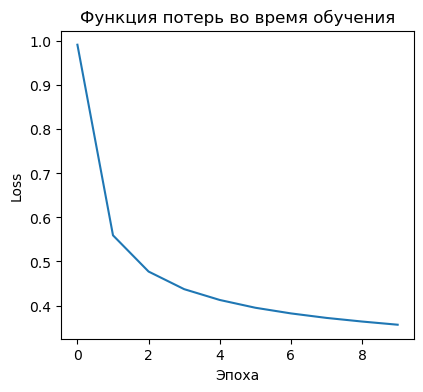

In [103]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

model = SingleLayerPerceptron(784, 10)

print("Однослойный персептрон:")

# Обучение и оценка
train_losses, test_acc = train_and_evaluate(
    model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor,
    epochs=10, lr=0.01
)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Функция потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Loss')


In [106]:
class SimplePerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimplePerceptron, self).__init__()
        
        # Полносвязный слой (классический персептрон)
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)
        
        x = self.fc(x)
        return x

Персептрон со скрытым слоем:
Epoch [1/10], Loss: 0.9927
Epoch [2/10], Loss: 0.5579
Epoch [3/10], Loss: 0.4761
Epoch [4/10], Loss: 0.4363
Epoch [5/10], Loss: 0.4117
Epoch [6/10], Loss: 0.3945
Epoch [7/10], Loss: 0.3815
Epoch [8/10], Loss: 0.3714
Epoch [9/10], Loss: 0.3630
Epoch [10/10], Loss: 0.3563
Test Accuracy: 0.9091


Text(0, 0.5, 'Loss')

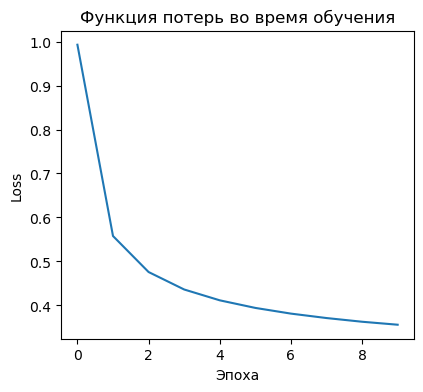

In [ ]:
model = SimplePerceptron(784, 10)

print("Персептрон со скрытым слоем:")

# Обучение и оценка
train_losses, test_acc = train_and_evaluate(
    model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor,
    epochs=10, lr=0.01
)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Функция потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Loss')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

class CNNPerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNNPerceptron, self).__init__()
        
        # Сверточный слой
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=3,
            padding=1
        )
        
        # Пулинг слой (уменьшает размерность)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        conv_output_size = 16 * 14 * 14
        
        # Полносвязный слой (классический персептрон)
        self.fc = nn.Linear(conv_output_size, output_size)
    
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        
        # Применяем сверточный слой + ReLU + пулинг
        x = self.pool(torch.relu(self.conv1(x)))
        
        x = x.view(x.size(0), -1)
        
        x = self.fc(x)
        return x

Сверточный персептрон:
Epoch [1/10], Loss: 2.0494
Epoch [2/10], Loss: 1.2180
Epoch [3/10], Loss: 0.6953
Epoch [4/10], Loss: 0.5274
Epoch [5/10], Loss: 0.4553
Epoch [6/10], Loss: 0.4159
Epoch [7/10], Loss: 0.3909
Epoch [8/10], Loss: 0.3731
Epoch [9/10], Loss: 0.3600
Epoch [10/10], Loss: 0.3496
Test Accuracy: 0.9112


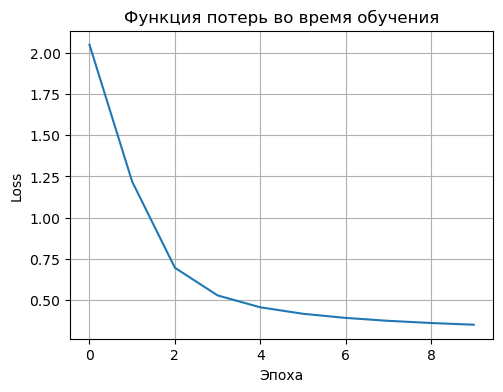

In [105]:
model = CNNPerceptron(784, 10)

print("Сверточный персептрон:")

# Обучение и оценка
train_losses, train_acc = train_and_evaluate(
    model, x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor,
    epochs=10, lr=0.001
)

# Визуализация процесса обучения
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Функция потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.grid(True)
